In [1]:
import sys

import warnings

import os

warnings.simplefilter('ignore')

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from skimage.io import imread, imshow 
from skimage.transform import resize 
from skimage.color import rgb2gray


In [2]:
act = os.listdir("E:/actinic keratosis")

der = os.listdir("E:/dermatofibroma")

mel = os.listdir("E:/melanoma")


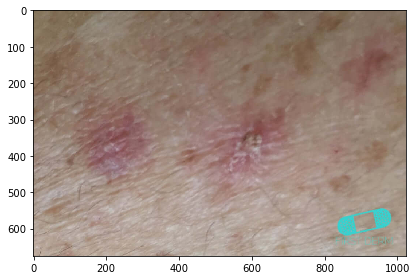

In [3]:
#actinic keratosis
limit=20

ac_images=[None]*limit

j=0

for i in act:
    if(j<limit):
        ac_images[j]=imread("E:/actinic keratosis/"+i)
        j+=1
    else:
        break

imshow(ac_images[19])


In [4]:
#grayscale conversion
limit=20

ac_gray=[None]*limit

k=0

for i in ac_images:
    if(k<limit):
        ac_gray[k]=rgb2gray(ac_images[k])
        k+=1
    else:
        break

imshow(ac_gray[19])



In [5]:
ac_gray[0].shape

(700, 989)

In [6]:
#resize
for l in range(20): 
    ac = ac_gray[l]
    ac_gray[l] = resize(ac, (512,512))

ac_gray[0].shape


(512, 512)

In [7]:
ac_gray[17].shape

(512, 512)

In [8]:
len_of_ac_images = len(ac_gray)

len_of_ac_images


20

In [9]:
imgsize_ac = ac_gray[0].shape

imgsize_ac



(512, 512)

In [10]:
flatten_size_ac = imgsize_ac[0]*imgsize_ac[1]

flatten_size_ac


262144

In [11]:
for i in range(len_of_ac_images):
    ac_gray[i] = np.ndarray.flatten(ac_gray[i]).reshape(flatten_size_ac,1) 
# Depth wise Stacking

ac_gray=np.dstack(ac_gray)

ac_gray.shape


(262144, 1, 20)

In [12]:
#Rolling axis

ac_gray = np.rollaxis(ac_gray,axis=2,start=0)

ac_gray.shape


(20, 262144, 1)

In [13]:
ac_gray = ac_gray.reshape(len_of_ac_images,flatten_size_ac)

ac_gray.shape


(20, 262144)

In [14]:
ac_data = pd.DataFrame(ac_gray)

ac_data


0         1         2         3         4         5         6       \
0   0.714398  0.729224  0.727938  0.713145  0.701101  0.708648  0.722882   
1   0.764583  0.758924  0.751146  0.744697  0.740259  0.729283  0.719448   
2   0.293470  0.294274  0.297385  0.292494  0.289329  0.302138  0.326347   
3   0.445795  0.445213  0.442961  0.441824  0.441226  0.442956  0.444450   
4   0.550750  0.550155  0.547850  0.574095  0.598709  0.592739  0.582652   
5   0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
6   0.448085  0.450173  0.458248  0.450935  0.439755  0.417355  0.401909   
7   0.644823  0.642233  0.632212  0.618936  0.605842  0.596213  0.590436   
8   0.644823  0.642233  0.632212  0.618936  0.605842  0.596213  0.590436   
9   0.712306  0.703828  0.674924  0.668138  0.661191  0.649073  0.643525   
10  0.391703  0.391755  0.395095  0.396368  0.395756  0.391469  0.384035   
11  0.614002  0.614662  0.600904  0.591556  0.588103  0.591288  0.605308   
12  0.718854  0.714417  0.716309  0.727076  0.709212  0.711025  0.707409   
13  0.507022  0.507022  0.507022  0.509021  0.511014  0.511496  0.512630   
14  0.298771  0.299306  0.301372  0.305186  0.309196  0.313062  0.316275   
15  0.298771  0.299306  0.301372  0.305186  0.309196  0.313062  0.316275   
16  0.637356  0.637068  0.635956  0.644983  0.655241  0.665207  0.672851   
17  0.655397  0.655562  0.656200  0.657993  0.659791  0.660767  0.661223   
18  0.655397  0.655562  0.656200  0.657993  0.659791  0.660767  0.661223   
19  0.434340  0.434340  0.434340  0.434340  0.436022  0.439910  0.443831   

      7         8         9       ...    262134    262135    262136    262137  \
0   0.735097  0.726029  0.727767  ...  1.000000  1.000000  1.000000  1.000000   
1   0.713996  0.710535  0.707480  ...  0.308830  0.304672  0.290876  0.277615   
2   0.367320  0.399551  0.427345  ...  0.698214  0.701024  0.696951  0.679318   
3   0.445595  0.446135  0.446368  ...  0.271180  0.271866  0.270424  0.264787   
4   0.566511  0.565876  0.573113  ...  0.585251  0.579936  0.574512  0.568876   
5   0.003922  0.003922  0.003922  ...  0.003922  0.003922  0.003922  0.003922   
6   0.396688  0.397491  0.401352  ...  0.456430  0.448932  0.441349  0.433598   
7   0.590326  0.591180  0.592524  ...  0.584934  0.582683  0.579506  0.574507   
8   0.590326  0.591180  0.592524  ...  0.584934  0.582683  0.579506  0.574507   
9   0.643883  0.650200  0.658178  ...  0.741055  0.734231  0.725165  0.723328   
10  0.379761  0.378028  0.380797  ...  0.546059  0.541112  0.542852  0.545278   
11  0.620328  0.637363  0.651776  ...  0.661264  0.651281  0.635499  0.626727   
12  0.702915  0.702058  0.697441  ...  0.564200  0.566358  0.580019  0.567464   
13  0.514725  0.515008  0.514370  ...  0.525094  0.517921  0.510292  0.501767   
14  0.318527  0.319495  0.319812  ...  0.381671  0.379419  0.377059  0.374487   
15  0.318527  0.319495  0.319812  ...  0.381671  0.379419  0.377059  0.374487   
16  0.677080  0.678816  0.679288  ...  0.505510  0.499310  0.495987  0.498331   
17  0.660913  0.660963  0.661196  ...  0.668948  0.666058  0.663327  0.660906   
18  0.660913  0.660963  0.661196  ...  0.668948  0.666058  0.663327  0.660906   
19  0.446876  0.460361  0.461167  ...  0.666469  0.653247  0.648741  0.648613   

      262138    262139    262140    262141    262142    262143  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   0.265910  0.254832  0.242148  0.238794  0.241240  0.245454  
2   0.675647  0.681470  0.690572  0.698463  0.692346  0.690764  
3   0.256742  0.247059  0.241639  0.237477  0.237477  0.237477  
4   0.564713  0.561551  0.554859  0.547417  0.538819  0.536596  
5   0.002961  0.001347  0.000566  0.000000  0.000000  0.000000  
6   0.433222  0.437860  0.451976  0.467950  0.485765  0.490370  
7   0.571902  0.570923  0.569150  0.567456  0.567456  0.567456  
8   0.571902  0.570923  0.569150  0.567456  0.567456  0.567456  
9   0.731799  0.751737  0.745410  0.730369  0.704044  0.6

In [15]:
ac_data["label"] = "Actinic Keratosis"

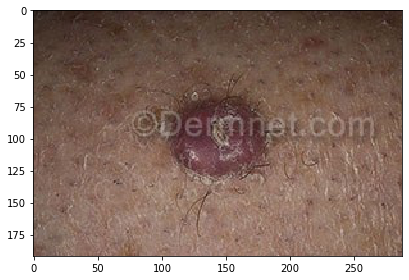

In [16]:
#Dermatofibroma
limit=60

de_images=[None]*limit

j=0
for i in der:
    if(j<limit):
        de_images[j]=imread("E:/dermatofibroma/"+i)
        j+=1
    else:
        break

imshow(de_images[1])



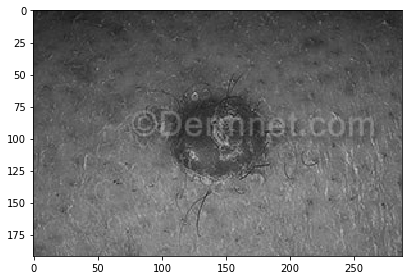

In [17]:
limit=60

de_gray=[None]*limit

k=0

for i in de_images:
    if(k<limit):
        de_gray[k] = rgb2gray(de_images[k])
        k+=1

imshow(de_gray[1])



In [18]:
de_gray[2].shape

(192, 288)

In [19]:
de_gray[3].shape

(192, 128)

In [20]:
l=0

for l in range(60):
    de = de_gray[l]
    de_gray[l] = resize(de, (512,512))

de_gray[3].shape


(512, 512)

In [21]:
de_gray[1].shape

(512, 512)

In [22]:
len_of_de_images = len(de_gray)

len_of_de_images


60

In [23]:
imgsize_de = de_gray[0].shape

imgsize_de


(512, 512)

In [24]:
flatten_size_de = imgsize_de[0]*imgsize_de[1]

flatten_size_de



262144

In [25]:
for i in range(len_of_de_images):
    de_gray[i] = np.ndarray.flatten(de_gray[i]).reshape(flatten_size_de,1)

de_gray=np.dstack(de_gray)

de_gray.shape


(262144, 1, 60)

In [26]:
de_gray = np.rollaxis(de_gray,axis=2,start=0)

de_gray.shape


(60, 262144, 1)

In [27]:
de_gray = de_gray.reshape(len_of_de_images,flatten_size_de)

de_gray.shape


(60, 262144)

In [28]:
de_gray = de_gray.reshape(len_of_de_images,flatten_size_de)

de_gray.shape


(60, 262144)

In [29]:
de_data = pd.DataFrame(de_gray)

de_data



0         1         2         3         4         5         6       \
0   0.295575  0.291985  0.292096  0.295686  0.299276  0.302866  0.304852   
1   0.151745  0.152388  0.155283  0.147779  0.138471  0.133848  0.132769   
2   0.620878  0.629916  0.670587  0.680359  0.683474  0.678458  0.670562   
3   0.560909  0.555701  0.555701  0.560909  0.566118  0.571326  0.574943   
4   0.424650  0.423179  0.416562  0.416690  0.418714  0.430019  0.438413   
5   0.523570  0.523358  0.522516  0.510457  0.497165  0.485944  0.482659   
6   0.687829  0.700759  0.751954  0.718219  0.675207  0.648277  0.628563   
7   0.501335  0.500803  0.498699  0.486840  0.474560  0.468389  0.467511   
8   0.546549  0.547866  0.553795  0.551681  0.547836  0.541907  0.540115   
9   0.830489  0.830147  0.828791  0.826046  0.824860  0.835246  0.846401   
10  0.580531  0.579796  0.576487  0.585701  0.596746  0.596332  0.590979   
11  0.703495  0.698158  0.677025  0.686175  0.695962  0.682356  0.685500   
12  0.782016  0.782317  0.783840  0.774417  0.762185  0.754275  0.751159   
13  0.397041  0.391219  0.370133  0.374665  0.387289  0.424112  0.442501   
14  0.318065  0.317452  0.315185  0.314329  0.313097  0.309413  0.307119   
15  0.432647  0.430407  0.421934  0.414818  0.409479  0.412585  0.417675   
16  0.510662  0.510159  0.507683  0.507342  0.507523  0.508341  0.508542   
17  0.651826  0.657199  0.677985  0.697017  0.712094  0.705390  0.695171   
18  0.355472  0.356839  0.363773  0.370839  0.377940  0.377252  0.374435   
19  0.552897  0.550569  0.541562  0.545362  0.551369  0.560805  0.564203   
20  0.563980  0.572121  0.603611  0.623966  0.638701  0.628849  0.622951   
21  0.525483  0.522180  0.508090  0.513089  0.519573  0.506575  0.506208   
22  0.564430  0.560811  0.547972  0.622413  0.691861  0.713544  0.683961   
23  0.580569  0.582441  0.590032  0.613998  0.637860  0.642335  0.638807   
24  0.597294  0.601947  0.620817  0.596036  0.569623  0.580375  0.601573   
25  0.573711  0.576713  0.588069  0.561549  0.536754  0.543703  0.554757   
26  0.442654  0.446424  0.463872  0.473746  0.481964  0.489284  0.491590   
27  0.590882  0.589011  0.580092  0.560401  0.538638  0.531908  0.529151   
28  0.628480  0.626960  0.619495  0.645178  0.678650  0.686563  0.688364   
29  0.475334  0.476822  0.483914  0.487348  0.489839  0.487922  0.488176   
30  0.469071  0.470389  0.476317  0.463403  0.448167  0.457516  0.468933   
31  0.721993  0.721145  0.716842  0.722275  0.730207  0.729987  0.726445   
32  0.529473  0.531947  0.541518  0.517490  0.496931  0.521420  0.536492   
33  0.720022  0.719044  0.715833  0.723371  0.729964  0.732526  0.728649   
34  0.736001  0.735036  0.731384  0.720806  0.710916  0.708770  0.708602   
35  0.778210  0.768109  0.728113  0.711568  0.700515  0.704400  0.701983   
36  0.447210  0.448141  0.451827  0.455356  0.458761  0.461495  0.463074   
37  0.622536  0.618615  0.603089  0.601714  0.604621  0.622937  0.634798   
38  0.204019  0.206551  0.221910  0.231580  0.239327  0.218443  0.197239   
39  0.551889  0.551889  0.555811  0.558318  0.559412  0.559959  0.559959   
40  0.593407  0.594683  0.599732  0.590113  0.576642  0.551082  0.545561   
41  0.474071  0.471095  0.459313  0.461337  0.464730  0.464590  0.458957   
42  0.588695  0.585648  0.573586  0.593080  0.610621  0.586496  0.568134   
43  0.445018  0.440167  0.420960  0.417646  0.418607  0.433334  0.439337   
44  0.639284  0.637227  0.629081  0.650132  0.675034  0.698781  0.713574   
45  0.502559  0.506413  0.521673  0.508774  0.491961  0.474940  0.477380   
46  0.583282  0.586223  0.599458  0.584316  0.564951  0.570289  0.575507   
47  0.616317  0.621701  0.643021  0.644371  0.641660  0.630299  0.625374   
48  0.616317  0.621701  0.643021  0.644371  0.641660  0.630299  0.625374   
49  0.670816  0.674783  0.690492  0.658127  0.625255  0.632835  0.654193   
50  0.627637  0.638052  0.679288  0.638357  0.591919  0.583963  0.578739   
51  0.554736  0.560581  0.583724  0.578503  0.568703  

In [30]:
de_data['label'] = "Dermatofibroma"

In [31]:
limit = 60

me_images = [None]*limit

j = 0

for i in mel:
    if(j<limit):
        me_images[j] = imread("E:/melanoma/"+i)
        j+=1
    else:break
imshow(me_images[0])


In [32]:
limit = 60
me_gray = [None]*limit
k = 0
for i in me_images:
    if(k<limit):
        me_gray[k] = rgb2gray(me_images[k])
        k+=1

imshow(me_gray[0])


In [33]:
me_gray[0].shape

(183, 274)

In [34]:
me_gray[2].shape

(222, 294)

In [35]:

for l in range(60):
    me = me_gray[l]
    me_gray[l] = resize(me, (512,512))
me_gray[0].shape


(512, 512)

In [36]:
me_gray[2].shape

(512, 512)

In [37]:
len_of_me_images = len(me_gray)

len_of_me_images


60

In [38]:
imgsize_me = me_gray[2].shape

imgsize_me


(512, 512)

In [39]:
flatten_size_me = imgsize_me[0]*imgsize_me[1]

flatten_size_me


262144

In [40]:
for i in range(len_of_me_images):
    me_gray[i] = np.ndarray.flatten(me_gray[i]).reshape(flatten_size_me,1)

me_gray = np.dstack(me_gray)

me_gray.shape


(262144, 1, 60)

In [41]:
me_gray = np.rollaxis(me_gray, axis = 2, start = 0)
me_gray.shape

(60, 262144, 1)

In [42]:
me_gray = me_gray.reshape(len_of_me_images,flatten_size_me)

me_gray.shape



(60, 262144)

In [43]:
me_data = pd.DataFrame(me_gray)

me_data


0         1         2         3         4         5         6       \
0   0.762739  0.761907  0.755569  0.736854  0.712759  0.719637  0.732928   
1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2   0.465104  0.468727  0.482740  0.495441  0.506042  0.505361  0.506778   
3   0.552625  0.557954  0.564827  0.579815  0.597420  0.611780  0.627081   
4   0.625663  0.625663  0.625663  0.626697  0.628673  0.629914  0.630526   
5   0.992195  0.992195  0.992195  0.991235  0.989401  0.988865  0.989439   
6   0.801063  0.797158  0.628589  0.560617  0.580168  0.588255  0.587258   
7   0.411803  0.411822  0.413045  0.413875  0.414346  0.416743  0.420790   
8   0.835709  0.835771  0.839767  0.844552  0.850055  0.854640  0.858440   
9   0.423405  0.423426  0.424791  0.425509  0.425639  0.426185  0.427086   
10  0.667489  0.667611  0.669633  0.672850  0.676895  0.681843  0.687275   
11  0.411803  0.411822  0.413045  0.413875  0.414346  0.416743  0.420790   
12  0.903091  0.903087  0.902802  0.902666  0.902666  0.901601  0.899625   
13  0.791390  0.795532  0.800662  0.796992  0.797306  0.794811  0.796557   
14  0.589461  0.558997  0.604641  0.698093  0.611684  0.551031  0.533500   
15  0.150458  0.167880  0.168891  0.171263  0.168381  0.175519  0.170790   
16  0.529286  0.529301  0.529917  0.530935  0.532302  0.534014  0.535998   
17  0.711609  0.711609  0.711609  0.710575  0.708599  0.706952  0.705588   
18  0.711609  0.711609  0.711609  0.710575  0.708599  0.706952  0.705588   
19  0.951154  0.951154  0.951154  0.950902  0.950420  0.949619  0.948544   
20  0.644004  0.644013  0.644625  0.645631  0.646995  0.648689  0.650665   
21  0.716613  0.716674  0.720626  0.724579  0.728531  0.732153  0.735494   
22  0.734382  0.734481  0.740880  0.743859  0.743721  0.738718  0.729549   
23  0.708544  0.708565  0.709929  0.711614  0.713590  0.715566  0.717542   
24  0.457304  0.457304  0.457304  0.457304  0.457304  0.457304  0.457304   
25  0.580105  0.580115  0.580727  0.578514  0.573728  0.565503  0.554332   
26  0.869426  0.869277  0.859674  0.847509  0.833009  0.821879  0.813632   
27  0.819045  0.819106  0.823058  0.828044  0.833973  0.839166  0.843730   
28  0.418615  0.418636  0.420000  0.421685  0.423661  0.425637  0.427613   
29  0.749838  0.749777  0.745825  0.740639  0.734329  0.727811  0.721117   
30  0.781163  0.779310  0.748739  0.738996  0.743674  0.749827  0.756767   
31  0.869426  0.869277  0.859674  0.847509  0.833009  0.821879  0.813632   
32  0.662651  0.662642  0.662030  0.660705  0.658728  0.656017  0.652677   
33  0.765009  0.765009  0.765009  0.765131  0.765653  0.766215  0.767493   
34  0.869098  0.869071  0.867292  0.863543  0.857996  0.849231  0.837710   
35  0.689450  0.689404  0.687420  0.684705  0.681353  0.678765  0.676781   
36  0.857806  0.857855  0.860959  0.863154  0.864518  0.864412  0.863048   
37  0.541507  0.540850  0.539216  0.538259  0.538742  0.541918  0.545183   
38  0.594672  0.594346  0.592993  0.589686  0.585980  0.581522  0.577827   
39  0.638563  0.636544  0.655601  0.676316  0.671210  0.649299  0.631440   
40  0.704728  0.708837  0.725108  0.723129  0.717929  0.708072  0.705981   
41  0.542458  0.561989  0.564498  0.546239  0.548284  0.563804  0.564886   
42  0.744112  0.739765  0.717720  0.751370  0.799313  0.756533  0.721486   
43  0.814250  0.816316  0.827520  0.826354  0.821629  0.820148  0.820447   
44  0.783440  0.785112  0.791296  0.784588  0.775260  0.759957  0.752985   
45  0.612662  0.602449  0.562011  0.543246  0.527186  0.509265  0.525706   
46  0.739666  0.739311  0.737909  0.685350  0.633579  0.633628  0.649869   
47  0.555966  0.551060  0.526954  0.549152  0.582331  0.591008  0.594703   
48  0.574378  0.562017  0.559161  0.554196  0.603305  0.598589  0.570431   
49  0.495747  0.498120  0.507518  0.509823  0.519473  0.584134  0.617520   
50  0.359870  0.362550  0.374612  0.386847  0.398229  0.394506  0.380291   
51  0.510425  0.508270  0.498002  0.508413  0.523381  

In [44]:
me_data['label'] = "Melanoma"

In [45]:
disease_1 = pd.concat([ac_data,me_data])

disease = pd.concat([disease_1,de_data])


In [50]:
disease

0         1         2         3         4         5         6  \
0    0.951154  0.951154  0.951154  0.950902  0.950420  0.949619  0.948544   
1    0.295575  0.291985  0.292096  0.295686  0.299276  0.302866  0.304852   
2    0.814250  0.816316  0.827520  0.826354  0.821629  0.820148  0.820447   
3    0.830489  0.830147  0.828791  0.826046  0.824860  0.835246  0.846401   
4    0.580531  0.579796  0.576487  0.585701  0.596746  0.596332  0.590979   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.708544  0.708565  0.709929  0.711614  0.713590  0.715566  0.717542   
136  0.778210  0.768109  0.728113  0.711568  0.700515  0.704400  0.701983   
137  0.749838  0.749777  0.745825  0.740639  0.734329  0.727811  0.721117   
138  0.625663  0.625663  0.625663  0.626697  0.628673  0.629914  0.630526   
139  0.655397  0.655562  0.656200  0.657993  0.659791  0.660767  0.661223   

            7         8         9  ...    262135    262136    262137  \
0    0.948065  0.948065  0.947179  ...  0.861048  0.857096  0.854966   
1    0.305507  0.306162  0.306817  ...  0.721226  0.707393  0.693559   
2    0.830436  0.834727  0.827438  ...  0.737191  0.719055  0.707078   
3    0.858792  0.848721  0.825824  ...  0.710860  0.726101  0.708849   
4    0.572780  0.566990  0.573607  ...  0.603451  0.599659  0.597454   
..        ...       ...       ...  ...       ...       ...       ...   
135  0.720408  0.723989  0.726656  ...  0.803011  0.801035  0.799940   
136  0.689457  0.676779  0.664015  ...  0.408360  0.406566  0.413298   
137  0.713541  0.705254  0.697418  ...  0.839616  0.839616  0.840497   
138  0.631894  0.633870  0.635497  ...  0.580552  0.586480  0.590647   
139  0.660913  0.660963  0.661196  ...  0.666058  0.663327  0.660906   

       262138    262139    262140    262141    262142    262143  \
0    0.855101  0.858513  0.865755  0.869544  0.869544  0.869544   
1    0.685374  0.683995  0.682616  0.681237  0.681194  0.682573   
2    0.714252  0.724397  0.727509  0.728948  0.724569  0.723761   
3    0.703521  0.705625  0.693962  0.681151  0.675120  0.673597   
4    0.600724  0.606101  0.608544  0.610240  0.609066  0.608806   
..        ...       ...       ...       ...       ...       ...   
135  0.799940  0.805875  0.818745  0.825479  0.825479  0.825479   
136  0.412254  0.406363  0.410828  0.416315  0.417858  0.418248   
137  0.842473  0.842626  0.840650  0.839616  0.839616  0.839616   
138  0.592623  0.593691  0.593699  0.593703  0.593703  0.593703   
139  0.661457  0.664030  0.668548  0.673414  0.678386  0.679672   

                 label  
0             Melanoma  
1       Dermatofibroma  
2             Melanoma  
3       Dermatofibroma  
4       Dermatofibroma  
..                 ...  
135           Melanoma  
136     Dermatofibroma  
137           Melanoma  
138           Melanoma  
139  Actinic Keratosis  

[140 rows x 262145 columns]

In [51]:
from sklearn.utils import shuffle

disease = shuffle(disease).reset_index()
disease

index         0         1         2         3         4         5  \
0      117  0.612662  0.602449  0.562011  0.543246  0.527186  0.509265   
1       42  0.687829  0.700759  0.751954  0.718219  0.675207  0.648277   
2       29  0.718854  0.714417  0.716309  0.727076  0.709212  0.711025   
3       21  0.670816  0.674783  0.690492  0.658127  0.625255  0.632835   
4      131  0.325921  0.312900  0.254306  0.240690  0.235517  0.220946   
..     ...       ...       ...       ...       ...       ...       ...   
135     24  0.546549  0.547866  0.553795  0.551681  0.547836  0.541907   
136    108  0.151745  0.152388  0.155283  0.147779  0.138471  0.133848   
137     13  0.919225  0.913350  0.913094  0.920981  0.927040  0.933967   
138     79  0.711609  0.711609  0.711609  0.710575  0.708599  0.706952   
139    125  0.583282  0.586223  0.599458  0.584316  0.564951  0.570289   

            6         7         8  ...    262135    262136    262137  \
0    0.525706  0.597280  0.628268  ...  0.551272  0.528824  0.516901   
1    0.628563  0.620428  0.648897  ...  0.455914  0.451391  0.463173   
2    0.707409  0.702915  0.702058  ...  0.566358  0.580019  0.567464   
3    0.654193  0.697654  0.714170  ...  0.642501  0.636609  0.636469   
4    0.234511  0.321230  0.398850  ...  0.506433  0.519619  0.540575   
..        ...       ...       ...  ...       ...       ...       ...   
135  0.540115  0.549077  0.560313  ...  0.582187  0.578258  0.560473   
136  0.132769  0.140903  0.144694  ...  0.504537  0.519269  0.478146   
137  0.941349  0.949985  0.954275  ...  0.886088  0.885736  0.881935   
138  0.705588  0.704641  0.704029  ...  0.693102  0.693102  0.693102   
139  0.575507  0.580414  0.573216  ...  0.568088  0.555452  0.544242   

       262138    262139    262140    262141    262142    262143  \
0    0.527445  0.551991  0.536332  0.520302  0.545689  0.552101   
1    0.472363  0.479937  0.486415  0.489090  0.465385  0.459399   
2    0.577400  0.584729  0.591534  0.589900  0.599459  0.595225   
3    0.630021  0.619642  0.614258  0.612382  0.630476  0.635045   
4    0.542812  0.537848  0.531229  0.524781  0.519680  0.518546   
..        ...       ...       ...       ...       ...       ...   
135  0.552048  0.547223  0.555288  0.562434  0.561193  0.560917   
136  0.433281  0.386977  0.388233  0.391266  0.389198  0.388738   
137  0.876603  0.869336  0.865324  0.864812  0.868732  0.870065   
138  0.693102  0.695581  0.700954  0.703766  0.703766  0.703766   
139  0.540730  0.540178  0.538676  0.536297  0.529817  0.528377   

                 label  
0             Melanoma  
1       Dermatofibroma  
2    Actinic Keratosis  
3       Dermatofibroma  
4             Melanoma  
..                 ...  
135     Dermatofibroma  
136     Dermatofibroma  
137           Melanoma  
138           Melanoma  
139     Dermatofibroma  

[140 rows x 262146 columns]

In [52]:
disease=disease.drop(['index'],axis=1)

disease


0         1         2         3         4         5         6  \
0    0.612662  0.602449  0.562011  0.543246  0.527186  0.509265  0.525706   
1    0.687829  0.700759  0.751954  0.718219  0.675207  0.648277  0.628563   
2    0.718854  0.714417  0.716309  0.727076  0.709212  0.711025  0.707409   
3    0.670816  0.674783  0.690492  0.658127  0.625255  0.632835  0.654193   
4    0.325921  0.312900  0.254306  0.240690  0.235517  0.220946  0.234511   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.546549  0.547866  0.553795  0.551681  0.547836  0.541907  0.540115   
136  0.151745  0.152388  0.155283  0.147779  0.138471  0.133848  0.132769   
137  0.919225  0.913350  0.913094  0.920981  0.927040  0.933967  0.941349   
138  0.711609  0.711609  0.711609  0.710575  0.708599  0.706952  0.705588   
139  0.583282  0.586223  0.599458  0.584316  0.564951  0.570289  0.575507   

            7         8         9  ...    262135    262136    262137  \
0    0.597280  0.628268  0.636079  ...  0.551272  0.528824  0.516901   
1    0.620428  0.648897  0.698269  ...  0.455914  0.451391  0.463173   
2    0.702915  0.702058  0.697441  ...  0.566358  0.580019  0.567464   
3    0.697654  0.714170  0.715298  ...  0.642501  0.636609  0.636469   
4    0.321230  0.398850  0.467370  ...  0.506433  0.519619  0.540575   
..        ...       ...       ...  ...       ...       ...       ...   
135  0.549077  0.560313  0.573824  ...  0.582187  0.578258  0.560473   
136  0.140903  0.144694  0.144143  ...  0.504537  0.519269  0.478146   
137  0.949985  0.954275  0.957040  ...  0.886088  0.885736  0.881935   
138  0.704641  0.704029  0.702640  ...  0.693102  0.693102  0.693102   
139  0.580414  0.573216  0.553914  ...  0.568088  0.555452  0.544242   

       262138    262139    262140    262141    262142    262143  \
0    0.527445  0.551991  0.536332  0.520302  0.545689  0.552101   
1    0.472363  0.479937  0.486415  0.489090  0.465385  0.459399   
2    0.577400  0.584729  0.591534  0.589900  0.599459  0.595225   
3    0.630021  0.619642  0.614258  0.612382  0.630476  0.635045   
4    0.542812  0.537848  0.531229  0.524781  0.519680  0.518546   
..        ...       ...       ...       ...       ...       ...   
135  0.552048  0.547223  0.555288  0.562434  0.561193  0.560917   
136  0.433281  0.386977  0.388233  0.391266  0.389198  0.388738   
137  0.876603  0.869336  0.865324  0.864812  0.868732  0.870065   
138  0.693102  0.695581  0.700954  0.703766  0.703766  0.703766   
139  0.540730  0.540178  0.538676  0.536297  0.529817  0.528377   

                 label  
0             Melanoma  
1       Dermatofibroma  
2    Actinic Keratosis  
3       Dermatofibroma  
4             Melanoma  
..                 ...  
135     Dermatofibroma  
136     Dermatofibroma  
137           Melanoma  
138           Melanoma  
139     Dermatofibroma  

[140 rows x 262145 columns]

In [53]:
x= disease.values[:,:-1]

y= disease.values[:,-1]
print(x)

print(y)


[[0.6126622916666681 0.6024492034313718 0.5620108946078416 ...
  0.5203016678155687 0.545688941865814 0.5521007448682548]
 [0.6878291969209577 0.7007590759038036 0.7519544075520892 ...
  0.48908956533394143 0.4653854254748727 0.4593987143841959]
 [0.7188544458725699 0.714416588529734 0.7163093713139986 ...
  0.5898999213724441 0.5994592673147412 0.5952254192159068]
 ...
 [0.919224660650723 0.9133502178448399 0.9130941246484142 ...
  0.8648119015098614 0.868731750044774 0.8700646107699918]
 [0.7116090196078431 0.7116090196078431 0.7116090196078431 ...
  0.7037658823529411 0.7037658823529411 0.7037658823529411]
 [0.583281568627452 0.5862227450980388 0.5994580392156859 ...
  0.536296507352941 0.5298167279411767 0.5283767769607846]]
['Melanoma' 'Dermatofibroma' 'Actinic Keratosis' 'Dermatofibroma'
 'Melanoma' 'Dermatofibroma' 'Dermatofibroma' 'Dermatofibroma' 'Melanoma'
 'Dermatofibroma' 'Dermatofibroma' 'Dermatofibroma' 'Melanoma' 'Melanoma'
 'Actinic Keratosis' 'Dermatofibroma' 'Dermatof

In [54]:
#Splitting data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

#Principal Component Analysis
from sklearn import decomposition
pca = decomposition.PCA(n_components =50, whiten=True,random_state=1)

pca.fit(x_train)


PCA(n_components=50, random_state=1, whiten=True)

In [55]:
x_train.shape

(119, 262144)

In [56]:
x_train_pca=pca.transform(x_train)

x_test_pca=pca.transform(x_test)

print(x_train_pca.shape)


(119, 50)


In [57]:
print(x_test_pca.shape)

(21, 50)


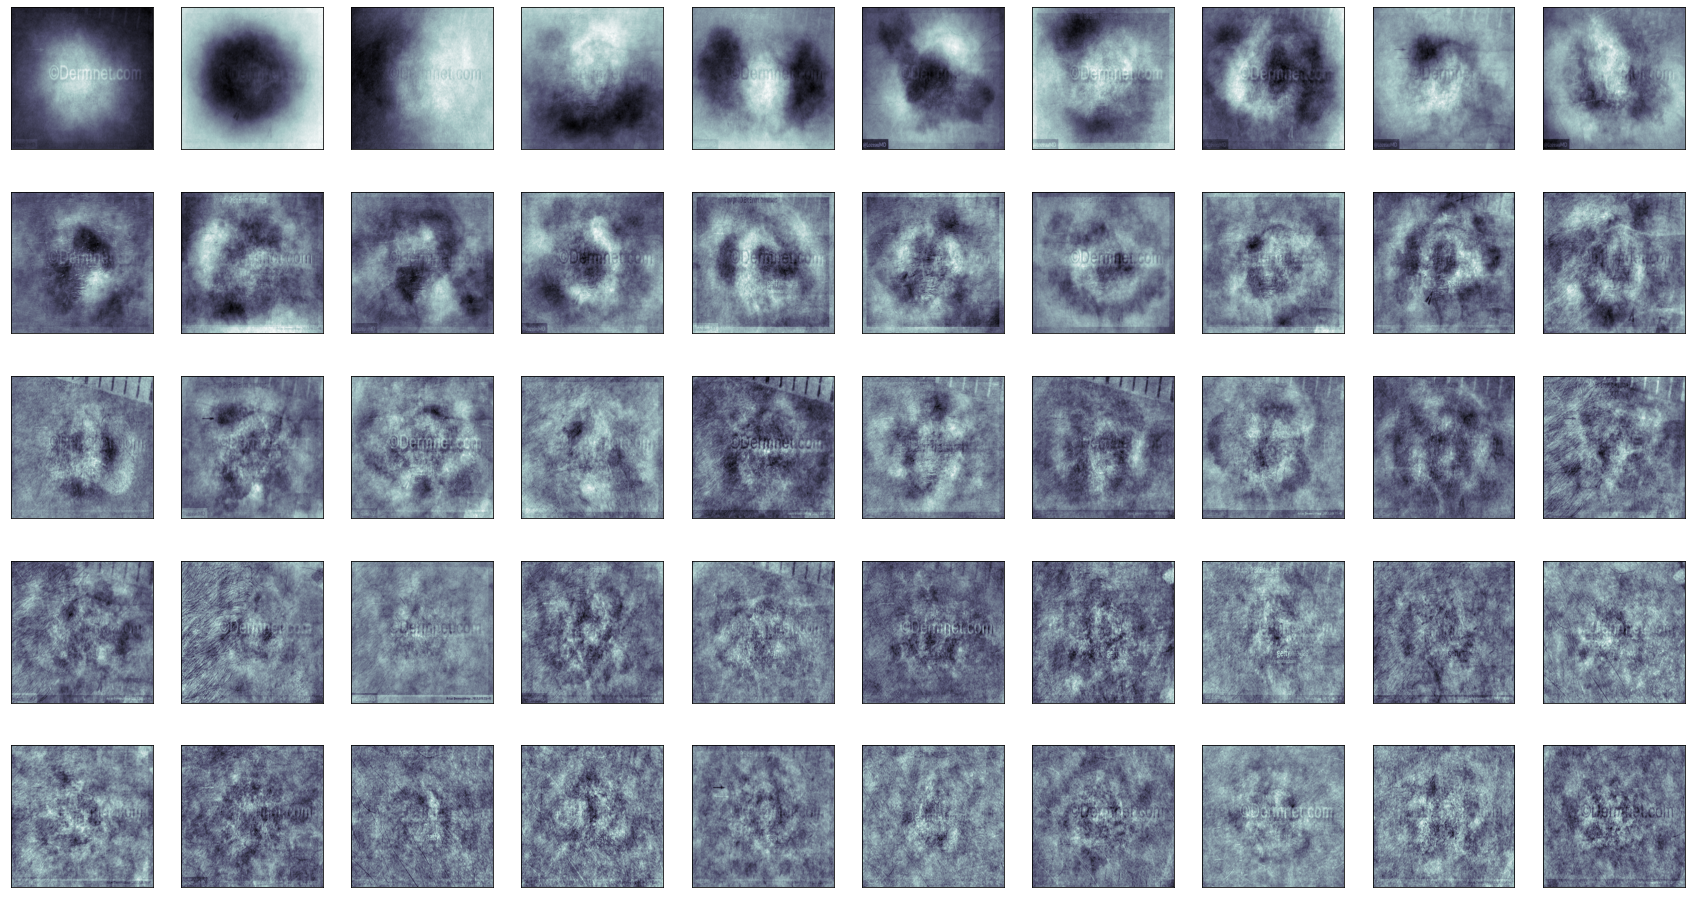

In [58]:
eigen = (np.reshape(x[60],(512,512)).astype(np.float64))

fig=plt.figure(figsize=(30,30))

for i in range(50):
    ax=fig.add_subplot(9,10,i+1,xticks=[],yticks=[]) 
    ax.imshow(pca.components_[i].reshape(eigen.shape),cmap=plt.cm.bone) 

In [59]:
#Support Vector Machines

from sklearn import svm

#Support Vector Classifier

clf = svm.SVC(C=2, gamma=0.006, kernel='rbf')
clf.fit(x_train_pca,y_train)


SVC(C=2, gamma=0.006)

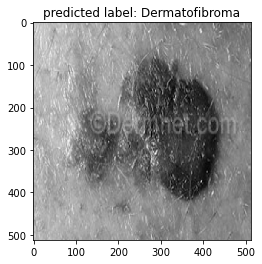

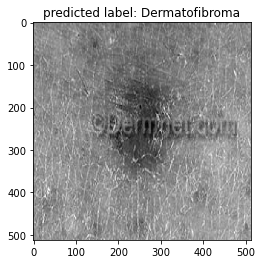

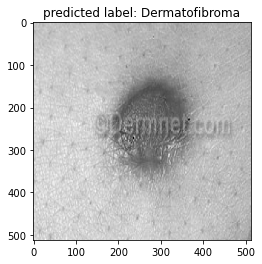

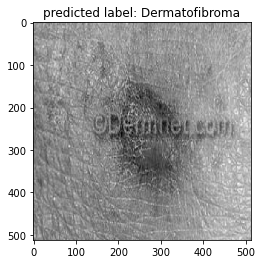

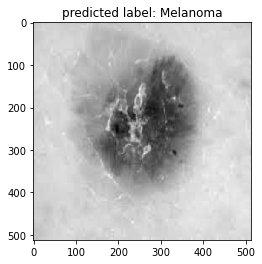

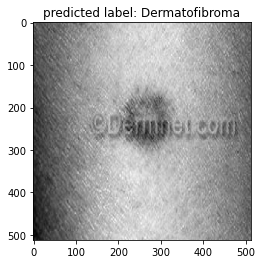

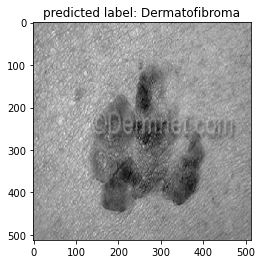

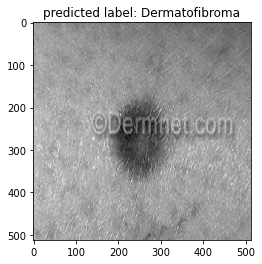

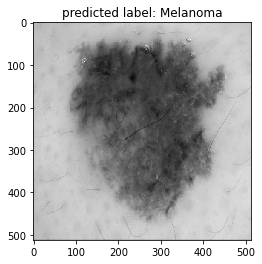

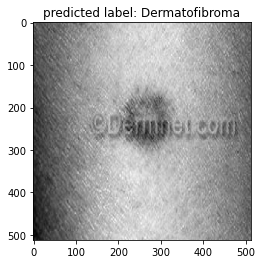

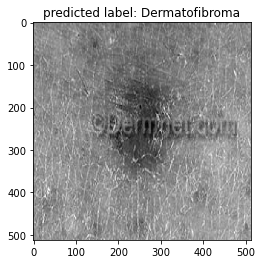

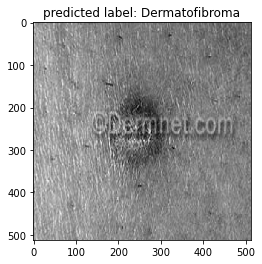

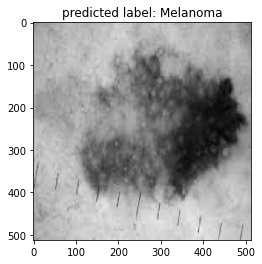

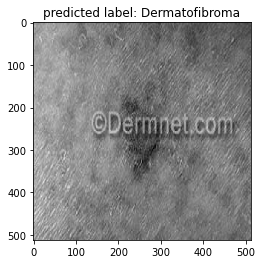

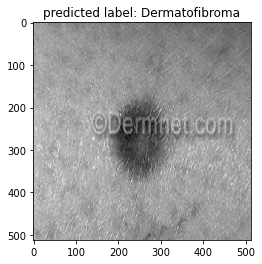

In [62]:
y_pred = clf.predict(x_test_pca)

for i in (np.random.randint(0,20,15)):
    predicted_images = (np.reshape(x_test[i], (512,512)).astype(np.float64))
    plt.title('predicted label: {0}'.format(y_pred[i]))
    plt.imshow(predicted_images, interpolation='nearest', cmap='gray')
    plt.show()


In [61]:
from sklearn import metrics

#Accuracy

accuracy = metrics.accuracy_score(y_test,y_pred)

accuracy



0.7619047619047619

In [63]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred)


array([[11,  0],
       [ 5,  5]], dtype=int64)